In [1]:
#Sentetik veriseti seti oluşturularak logistik model oluşturulacaktır

In [14]:
import pandas as pd
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

#ekrana basılantablolar icin genisview
pd.set_option('display.max_columns',None)

#2 etiketli sınıflandırma veriseti
x, y = make_blobs(n_samples=1000
                  ,n_features = 7
                  ,centers = 2
                  ,cluster_std = 5) #gürültü

df = pd.DataFrame({"x1":x[:,0],
                   "x2":x[:,1],
                   "x3":x[:,2],
                   "x4":x[:,3],
                   "x5":x[:,4],
                   "x6":x[:,5],
                   "target":y})

df = round(df ,3) #degiskenlerin float degerlerini kucultme
print(df.head()) #ilk 5 satir

       x1      x2     x3     x4     x5      x6  target
0  -7.563  -4.664 -1.555 -1.383  1.995   0.877       0
1   7.380  -0.796 -3.900 -7.362  4.462   5.570       1
2 -10.379   3.000  0.482 -1.839  6.722   5.181       0
3   4.360 -10.965 -6.001 -0.404  4.015   0.354       1
4  16.710 -11.736 -2.661 -9.608 -5.797  19.007       1


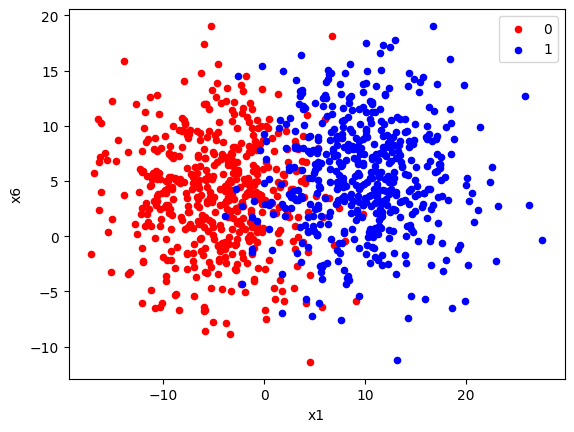

In [15]:
#elimizde sentetik veriler olduğu için 2veri arasındaki ilişkiyi hedef değişken üzerinden inceleme:
colors = {0:'red', 1:'blue'}
fig,ax = plt.subplots()
grouped = df.groupby('target')
for key, group in grouped:
    group.plot(ax=ax,kind='scatter', x='x1', y='x6', label=key, color=colors[key])
plt.show()

In [16]:
print(df.describe())

                x1           x2           x3           x4           x5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.659154    -2.522290    -5.144269    -5.410199     3.430269   
std       8.841191     7.539734     6.822969     5.359730     5.105165   
min     -17.177000   -22.206000   -27.123000   -21.279000   -15.128000   
25%      -4.364750    -8.589250   -10.351750    -9.080250    -0.252500   
50%       2.855500    -2.699500    -5.126000    -5.310000     3.792000   
75%       9.897000     3.447250    -0.069750    -1.806500     6.948250   
max      27.558000    19.786000    11.807000    10.775000    17.899000   

                x6      target  
count  1000.000000  1000.00000  
mean      4.584480     0.50000  
std       5.095704     0.50025  
min     -11.384000     0.00000  
25%       1.248500     0.00000  
50%       4.445000     0.50000  
75%       8.027500     1.00000  
max      19.047000     1.00000  


In [17]:
#tabloda gözüktüğü gibi sentetik verideki X değişkenlerinin ortalama ve medyan değerleri birbirine yakın ve normal dağılmıştır
#hedef ise 0.5 dengeli olarak dağılım gösterir

In [18]:
#modellemeden önce sentetik veride neyin hedef neyin değişken olduğunu belirleyelim
target = df.target
predictors = df.drop(columns = "target", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(predictors
                                                    ,target
                                                    ,test_size=0.25
                                                    ,random_state=0)

In [ ]:
#test için %25, train için %75

In [19]:
# logistik regresyon
lr = LogisticRegression()

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test) #modelin test verisine uygulanmasi

In [20]:
print(metrics.confusion_matrix(y_test, y_pred))

# Görsel confusion matrix
import scikitplot.metrics as splt
splt.plot_confusion_matrix(y_test, y_pred)

[[106   3]
 [  1 140]]


ModuleNotFoundError: No module named 'scikitplot'

In [21]:
print("Accuracy Score")
print(metrics.accuracy_score(y_test, y_pred))


print("Precision Score")
print(metrics.precision_score(y_test, y_pred))


print("Recall Score")
print(metrics.recall_score(y_test, y_pred))


Accuracy Score
0.984
Precision Score
0.9790209790209791
Recall Score
0.9929078014184397


In [ ]:
#Elimizde sentetik veriler oldugu icin yüksek bir başarı oranı aldık

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_layo'

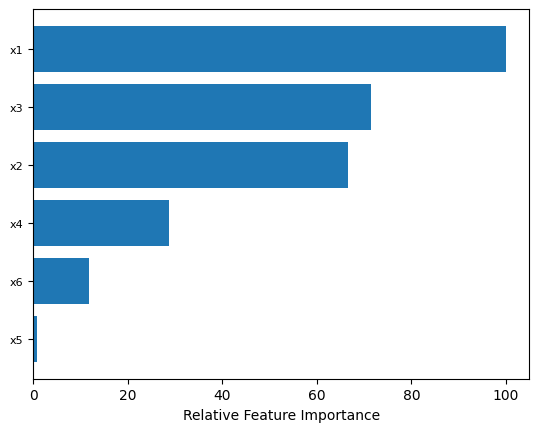

In [22]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(predictors.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layo

In [ ]:
#Yukarıdaki grafikte dağımsız değişkenlerin hedef değişkenler üzerinde ne derece bir önem yani ağırlığa sahip olduğu gösterilir